<img style="float: left;" src="images\EP_Logo.png" alt="UoE" width="300px"/>
<img style="float: right;" src="images\UoE_Logo.png" alt="UoE" width="300px"/>
<img style="float: left;" src="images\urban_rural_scape.png" alt="UoE" width="1000px"/>

# Introduction to the Gaussian Plume model - particle transport
Jupyter notebook for ECSC09005 Environmental Pollution  
author: John Moncrieff *for* Session 2020-21  [version 0.12, latest 16:51, 26 Jan 2021]
## Background
As discussed in the lecture series, the gaussian plume model is the workhorse for air pollution modelling.  But what is the basis for its longevity and utility? In this exercise, I want to explore with you how the seemingly random motion of particles in the air can be harnessed to produce a workable solution to pollutant transfer - the gaussian plume model. 
<img style="float: right;" src="images/balloons.png" alt="hot air balloons" width="360px"/></p>
## Imports
Let's start by importing some libraries to the environment:
- *matplotlib inline* for creating inline plots
- *numpy* for numerical routines
- *matplotlib* for plotting data
- *ipywidgets* for interactivity
- *Model* the code for the large particle model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
import Model
import time
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
# for Palatino and other serif fonts use:
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
# rc('text', usetex = False)
print('imports OK')

imports OK


## Let's start by looking at the movement of individual particles in the air.
We will **release** 5 particles from the same starting point and watch how they move across the screen.

<IPython.core.display.Javascript object>


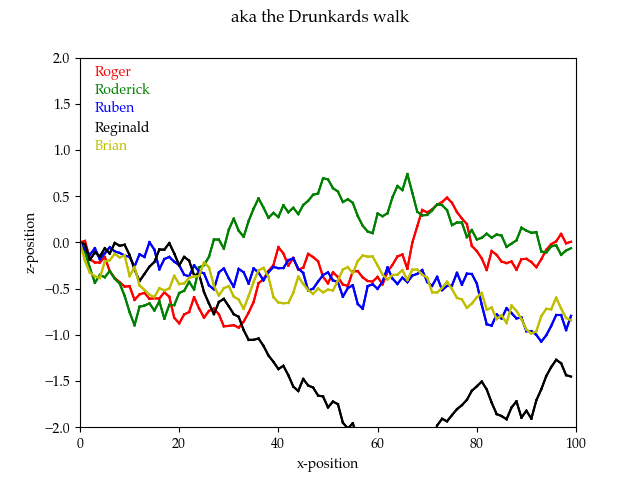

In [2]:
nsteps = 100
fig1 = plt.figure(num="Random Walk")
fig1.suptitle('aka the Drunkards walk')
ax1 = fig1.add_subplot(111)
plt.axis([0, 100, -2, 2])
plt.xlabel('x-position')
plt.ylabel('z-position') 
cols = ['r','g','b','k','y']
lbls = ['Roger', 'Roderick', 'Ruben', 'Reginald', 'Brian']
# cultural references hopefully are obvious - think Monty Python!
st_x = 3; st_y = 1.8

for p in range(0,5):
    oldw = 0.0
    plt.text(st_x, st_y-0.2*p, lbls[p], c=cols[p])
    for i in range(1, nsteps):
        yi = np.random.normal(0)
        # Weiner process
        neww = oldw+(yi/np.sqrt(nsteps))
        x = [i-1,i]
        y = [oldw, neww]
        ax1.plot(x,y, c=cols[p])
        oldw = neww
        ax1.plot(x,y, c=cols[p], label=lbls[p])
        fig1.canvas.draw()


<img style="float: right;" src="images/cigsmoke.png" alt="cigarette smoke" width="210px"/></p> In the figure above, you can see that the individual particles follow their own path - yes they are moved (or advected) along with the average wind from left to right across the screen but they all move up and down (or left to right if you want to think like that) differently from start to finish. If you re-run this model, you'll see a different pattern - every time. That's the nature of atmospheric turbulence of course - its random or chaotic at the smallest scales. Rather than being individual particles in the air, you can also think of it as 5 students leaving the pub (pre-lockdown, of course) having consumed at least one too many and making their way along the street - you can see why they sometimes call this the drunkards walk too! 

This is an example of a random walk process and is how individual particles move in the atmosphere (a bit like the Brownian motion you learned about in chemistry classes at school).

The simple random walk model is described by the langevin equation.

> $w_n = \alpha w_{n-1} + \beta \sigma_w r_n$  
    where:  
    $w_n$ is the vertical velocity  
    $\alpha, \beta$ are parameters related to the particles 'memory'  
    $\sigma_w$ is a measure of plume spread, a function of stability  
    $r_n$ is a gaussian random number (0 mean, unit variance)  
    

<div class="alert alert-block alert-info">
You don't need to remember the mathematical details; suffice to say that a particles position at any instant ($w_n$) is partly dependent on where it was a moment ago ($w_{n-1}$) PLUS a random component moving it in any direction between the last and its current position. We discussed this in slide 24 of Lecture 3.
</div>


Rather than just 5 particles, what would happen if you released tens, hundreds, thousands etc? Let's see.  
We've developed a model that is based on the same principles as above but one in which you can influence the atmopsheric stability and wind speed. Let's play.

<IPython.core.display.Javascript object>


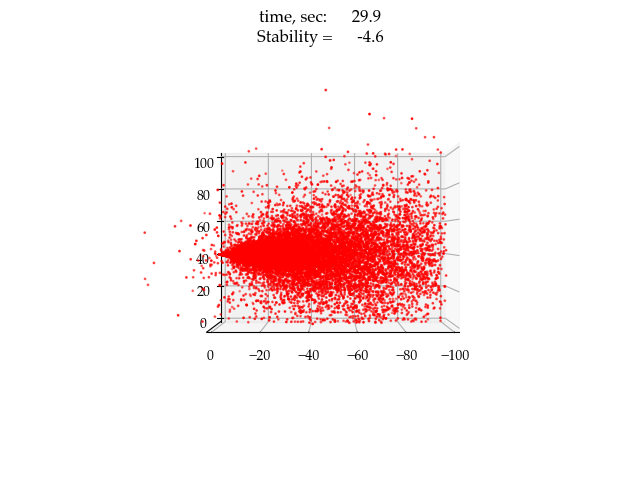

In [3]:
# The controller part
# Create a new MODEL object
# BL_height, disp_height, roughness, Tv, max_range, max_height)
model = Model.Model(1000, 0, 0.3, 283, 100, 100)
# add_particles(count, x, y, z, ustar, theta, H)
model.add_particles(10, [0], [0], [40], 0.2, -180, 150)
model.run()


<div class="alert alert-block alert-info">
Have a play with the different driving variables. How does the plume shape vary with stability or wind speed?.
</div>

## Kjlun Obukhov length and Pasquill-Gifford stability terms
| Pasquill-Gifford       | Obukhov Length     | U* (ms -1)     |  w*.  (m s-1)  |h (m) |
| :------------- | :----------: | :-----------: |:-----------: | ---------:|
|  A | -5   | 0.2    | 2.0.  | 2000 |
| B   | -30 | 0.2  | 1.0.  | 1500 |
|  C | -650  | 0.3    | 0.5.  | 1200 |
| D  | inf | 0.5 |  0.0  |1000 |
|  E | 1000   | 0.4    |  - |  800 |
| F  | 130 | 0.3 |  -  | 250 |
| G  | 84     | 0.3    |  - | 200 |
(from Kjlun 2004)

### ADMS - Obukhov length and Pasquill-Gifford stability terms
| Pasquill-Gifford       | Obukhov Length     | U (ms -1)     |  h (m) |
| :------------- | :----------: | :-----------: |-----------: |
|  A | -2   | 1    | 1300 |
| B   | -10 | 2  | 900 |
|  C | -100  | 5    | 850 |
| D  | inf | 5 |  800 |
|  E | 100   | 3    | 400 |
| F  | 20 | 2 |  100 |
| G  | 5     | 1    |  100 |
(from ADMS Tech Summary)